<a href="https://colab.research.google.com/github/kunalvasudevan/hot-zone/blob/master/final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intializing the header file

In [2]:
import numpy as np 
import pandas as pd 
%matplotlib inline 
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#1 Consider a subset ( 30 rows) of @bar. How do 'bidprice', 'askprice', 'average_price' of any stock are moving in that subset period? Maybe you can try for ‘2020-08-03’. Graphical and data analysis. Dataset @quote @bar dataset

In [16]:
D0 = pd.read_csv("bar.csv")
D0.head(30)


,time,symbol,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
0,2020-09-02 22:46:00+00:00,AAPL,100,5477495,131.5890,131.589,131.589,131.589,131.589,131.5506,1.599087e+12,1.599087e+12
1,2020-09-02 22:45:00+00:00,AAPL,100,5477395,131.5190,131.519,131.519,131.519,131.519,131.5506,1.599087e+12,1.599087e+12
2,2020-09-02 22:43:00+00:00,AAPL,100,5477295,131.5590,131.559,131.559,131.559,131.559,131.5506,1.599087e+12,1.599087e+12
3,2020-09-02 21:15:00+00:00,AAPL,100,5477167,131.5440,131.544,131.544,131.544,131.544,131.5506,1.599081e+12,1.599081e+12
4,2020-09-02 21:12:00+00:00,AAPL,100,5477067,131.4390,131.439,131.439,131.439,131.439,131.5506,1.599081e+12,1.599081e+12
5,2020-09-02 21:08:00+00:00,FANG,100,202172,36.6400,36.640,36.640,36.640,36.640,37.1381,1.599081e+12,1.599081e+12
6,2020-09-02 21:06:00+00:00,AAPL,100,5476967,131.3510,131.351,131.351,131.351,131.351,131.5506,1.599081e+12,1.599081e+12
7,2020-09-02 21:05:00+00:00,AAPL,199,5476867,131.4140,131.414,131.414,131.414,131.414,131.5506,1.599081e+12,1.599081e+12
8,2020-09-02 21:01:00+00:00,AAPL,300,5476668,131.4030,131.404,131.404,131.401,131.401,131.5506,1.599080e+12,1.599081e+12
9,2020-09-02 21:00:00+00:00,AAPL,200,5476368,131.3740,131.374,131.374,131.374,131.374,131.5506,1.599080e+12,1.599080e+12


In [115]:
D0.tail()

,time,symbol,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
1074854,2020-08-04 19:46:00+00:00,HPQ,5256,989384,17.8981,17.900,17.900,17.890,17.895,17.8757,1.596570e+12,1.596570e+12
1074855,2020-08-04 19:46:00+00:00,ICE,670,226960,95.8265,95.830,95.830,95.825,95.825,95.5166,1.596570e+12,1.596570e+12
1074856,2020-08-04 19:46:00+00:00,VLO,764,375410,53.0068,53.015,53.015,53.000,53.000,52.9820,1.596570e+12,1.596570e+12
1074857,2020-08-04 19:46:00+00:00,CF,2904,437066,32.4800,32.475,32.485,32.475,32.485,32.5062,1.596570e+12,1.596570e+12
1074858,2020-08-04 19:46:00+00:00,PNW,404,70036,81.2902,81.280,81.300,81.280,81.300,81.0000,NaN,NaN


In [116]:
D0.dtypes

time                            object
symbol                          object
volume                           int64
accumulated_volume               int64
VWAP                           float64
open_price                     float64
high_price                     float64
low_price                      float64
close_price                    float64
average_price                  float64
epoch_time_at_the_beginning    float64
epoch_time_at_the_ending       float64
dtype: object

In [117]:
D0.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,1074859.0,1.875906e+03,2.122995e+04,2.000000e+01,2.420000e+02,6.000000e+02,1.400000e+03,1.800846e+07
accumulated_volume,1074859.0,3.124891e+05,7.315797e+05,2.000000e+01,4.676800e+04,1.164970e+05,2.967650e+05,2.861238e+07
VWAP,1074859.0,1.121478e+02,2.110653e+02,3.497500e+00,3.500130e+01,6.625750e+01,1.293700e+02,4.244143e+03
open_price,1074859.0,1.121480e+02,2.110659e+02,3.500000e+00,3.500000e+01,6.625500e+01,1.293700e+02,4.245235e+03
high_price,1074859.0,1.121641e+02,2.110909e+02,3.500000e+00,3.501000e+01,6.627000e+01,1.293900e+02,4.245235e+03
low_price,1074859.0,1.121318e+02,2.110422e+02,3.480000e+00,3.499500e+01,6.624000e+01,1.293500e+02,4.243040e+03
close_price,1074859.0,1.121479e+02,2.110666e+02,3.500000e+00,3.500000e+01,6.625500e+01,1.293700e+02,4.243040e+03
average_price,1074859.0,1.121125e+02,2.109291e+02,3.533100e+00,3.501285e+01,6.612610e+01,1.294900e+02,4.251348e+03
epoch_time_at_the_beginning,1074858.0,1.597229e+12,5.010430e+08,1.596570e+12,1.596818e+12,1.597168e+12,1.597423e+12,1.599087e+12
epoch_time_at_the_ending,1074858.0,1.597229e+12,5.010430e+08,1.596570e+12,1.596818e+12,1.597168e+12,1.597423e+12,1.599087e+12


In [118]:
D0.describe(include=['object'])


,time,symbol
count,1074859,1074859
unique,4265,505
top,2020-08-05 19:59:00+00:00,AAPL
freq,503,3570


In [124]:
mpl.style.use('dark_background') 


In [120]:
D0[['time','average_price']]


,time,average_price
0,2020-09-02 22:46:00+00:00,131.5506
1,2020-09-02 22:45:00+00:00,131.5506
2,2020-09-02 22:43:00+00:00,131.5506
3,2020-09-02 21:15:00+00:00,131.5506
4,2020-09-02 21:12:00+00:00,131.5506
...,...,...
1074854,2020-08-04 19:46:00+00:00,17.8757
1074855,2020-08-04 19:46:00+00:00,95.5166
1074856,2020-08-04 19:46:00+00:00,52.9820
1074857,2020-08-04 19:46:00+00:00,32.5062


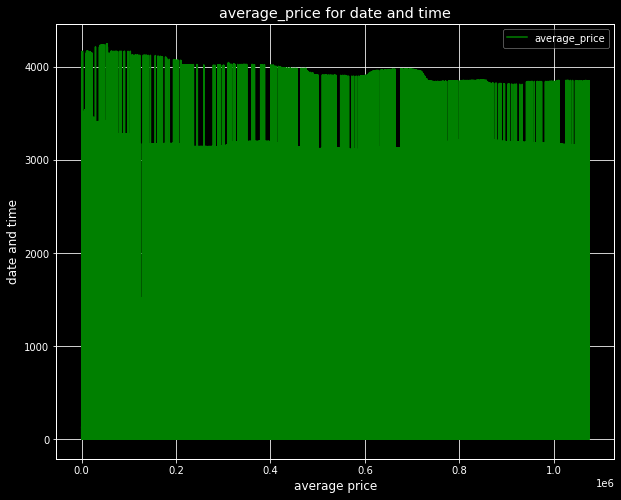

In [122]:
D0[['time','average_price']].plot(kind='line', figsize=(10, 8),color='g')
plt.title('average_price for date and time')
plt.ylabel('date and time') 
plt.xlabel('average price') 
plt.show()

Text(0.5, 1.0, 'average_price for date and time')

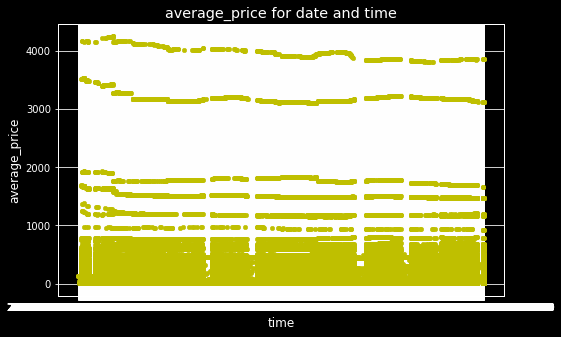

In [125]:
D0.plot(kind='scatter', x='time', y='average_price', figsize=(8,5), color='y')
plt.title('average_price for date and time')

In [ ]:
D0[['time','average_price']].plot(kind='bar', figsize=(8, 5),color='b')
plt.title('average_price for date and time') 
plt.ylabel('date and time') 
plt.xlabel('average price') 
plt.show()

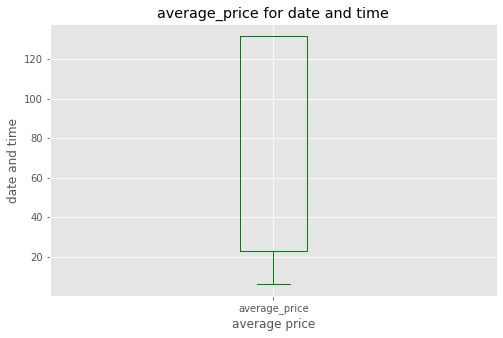

In [23]:
D0[['time','average_price']].plot(kind='box', figsize=(8, 5),color='g')
plt.title('average_price for date and time') 
plt.ylabel('date and time') 
plt.xlabel('average price') 
plt.show()

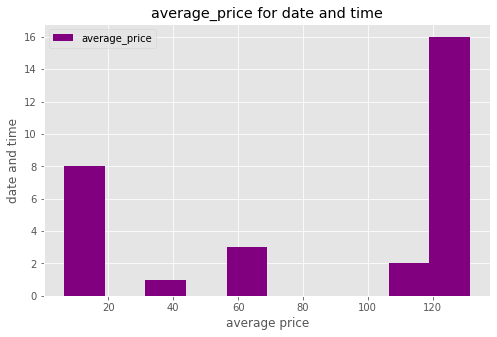

In [24]:
D0[['time','average_price']].plot(kind='hist', figsize=(8, 5),color='purple')
plt.title('average_price for date and time')
plt.ylabel('date and time') 
plt.xlabel('average price') 
plt.show()

In [25]:
D0.corr()

,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
volume,1.000000,0.484179,-0.493481,-0.493487,-0.493467,-0.493506,-0.493499,-0.491448,-0.224584,-0.224584
accumulated_volume,0.484179,1.000000,-0.516425,-0.516428,-0.516411,-0.516467,-0.516462,-0.506901,-0.059581,-0.059581
VWAP,-0.493481,-0.516425,1.000000,1.000000,1.000000,1.000000,1.000000,0.999812,0.288285,0.288285
open_price,-0.493487,-0.516428,1.000000,1.000000,1.000000,1.000000,1.000000,0.999812,0.288241,0.288241
high_price,-0.493467,-0.516411,1.000000,1.000000,1.000000,1.000000,1.000000,0.999812,0.288188,0.288188
low_price,-0.493506,-0.516467,1.000000,1.000000,1.000000,1.000000,1.000000,0.999812,0.288373,0.288373
close_price,-0.493499,-0.516462,1.000000,1.000000,1.000000,1.000000,1.000000,0.999812,0.288352,0.288352
average_price,-0.491448,-0.506901,0.999812,0.999812,0.999812,0.999812,0.999812,1.000000,0.291585,0.291585
epoch_time_at_the_beginning,-0.224584,-0.059581,0.288285,0.288241,0.288188,0.288373,0.288352,0.291585,1.000000,1.000000
epoch_time_at_the_ending,-0.224584,-0.059581,0.288285,0.288241,0.288188,0.288373,0.288352,0.291585,1.000000,1.000000


In [28]:
D0[['symbol','average_price']]

,symbol,average_price
0,AAPL,131.5506
1,AAPL,131.5506
2,AAPL,131.5506
3,AAPL,131.5506
4,AAPL,131.5506
5,FANG,37.1381
6,AAPL,131.5506
7,AAPL,131.5506
8,AAPL,131.5506
9,AAPL,131.5506


In [29]:
group=D0[['symbol', 'average_price']].groupby(['symbol'])
group.head(2)

,symbol,average_price
0,AAPL,131.5506
1,AAPL,131.5506
5,FANG,37.1381
10,BBY,113.3237
11,GE,6.3711
12,GE,6.3711
13,COG,18.3008
16,PVH,59.3275
23,PVH,59.3211
26,CDNS,115.8448


In [30]:
fail_val, pass_val = stats.f_oneway(group.get_group('AAPL')['average_price'], group.get_group('FANG')['average_price'], group.get_group('BBY')['average_price'],group.get_group('GE')['average_price'],group.get_group('COG')['average_price'],group.get_group('PVH')['average_price'],group.get_group('CDNS')['average_price'])  
 
print( "ANOVA results: Fail=", fail_val, ", Pass =", pass_val)

ANOVA results: F= 7082579900.013088 , P = 2.2916192818611397e-105


In [31]:
D1=pd.read_csv("quote.csv")

In [32]:
D1.head(30)

,time,ticker,bid_price,bid_size,ask_price,ask_size
0,2020-08-03 19:59:59+00:00,AKAM,112.89,1.0,113.05,3.0
1,2020-08-03 19:59:59+00:00,AIZ,107.26,1.0,113.65,1.0
2,2020-08-03 19:59:59+00:00,AES,15.11,1.0,15.13,3.0
3,2020-08-03 19:59:59+00:00,ADP,134.37,2.0,134.72,7.0
4,2020-08-03 19:59:59+00:00,AAPL,435.79,1.0,439.84,1.0
5,2020-08-03 19:59:59+00:00,AKAM,112.69,8.0,113.05,3.0
6,2020-08-03 19:59:59+00:00,AME,94.90,1.0,95.08,1.0
7,2020-08-03 19:59:59+00:00,ALLE,100.01,8.0,100.59,3.0
8,2020-08-03 19:59:59+00:00,ADI,116.47,2.0,116.62,2.0
9,2020-08-03 19:59:59+00:00,AEP,85.74,1.0,85.80,1.0


In [33]:
D1.dtypes


time          object
ticker        object
bid_price    float64
bid_size     float64
ask_price    float64
ask_size     float64
dtype: object

In [34]:
D1.describe().T

,count,mean,std,min,25%,50%,75%,max
bid_price,333202.0,360.054350,751.271773,10.42,35.38,77.81,175.77,3137.54
bid_size,333202.0,3.823335,9.255894,1.00,1.00,1.00,2.00,223.00
ask_price,333202.0,363.043747,757.887373,10.44,35.40,78.00,176.38,3281.23
ask_size,333202.0,5.351258,15.825785,1.00,1.00,1.00,2.00,215.00


In [35]:
D1[['time','bid_price','ask_price']]

,time,bid_price,ask_price
0,2020-08-03 19:59:59+00:00,112.89,113.05
1,2020-08-03 19:59:59+00:00,107.26,113.65
2,2020-08-03 19:59:59+00:00,15.11,15.13
3,2020-08-03 19:59:59+00:00,134.37,134.72
4,2020-08-03 19:59:59+00:00,435.79,439.84
5,2020-08-03 19:59:59+00:00,112.69,113.05
6,2020-08-03 19:59:59+00:00,94.90,95.08
7,2020-08-03 19:59:59+00:00,100.01,100.59
8,2020-08-03 19:59:59+00:00,116.47,116.62
9,2020-08-03 19:59:59+00:00,85.74,85.80


In [36]:
D1.describe(include=['object'])


,time,ticker
count,30,30
unique,1,18
top,2020-08-03 19:59:59+00:00,AKAM
freq,30,5


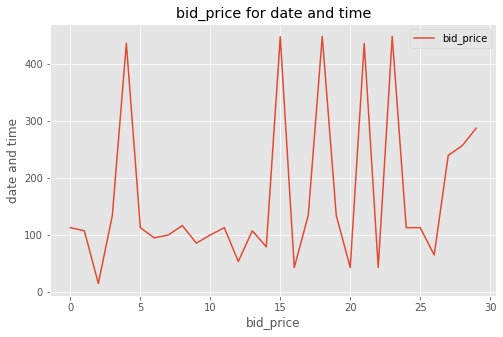

In [37]:
D1[['time','bid_price']].plot(kind='line', figsize=(8, 5))
plt.title('bid_price for date and time') # add a title to the histogram
plt.ylabel('date and time') # add y-label
plt.xlabel('bid_price') # add x-label

plt.show()

Text(0.5, 1.0, 'bid_price for date and time')

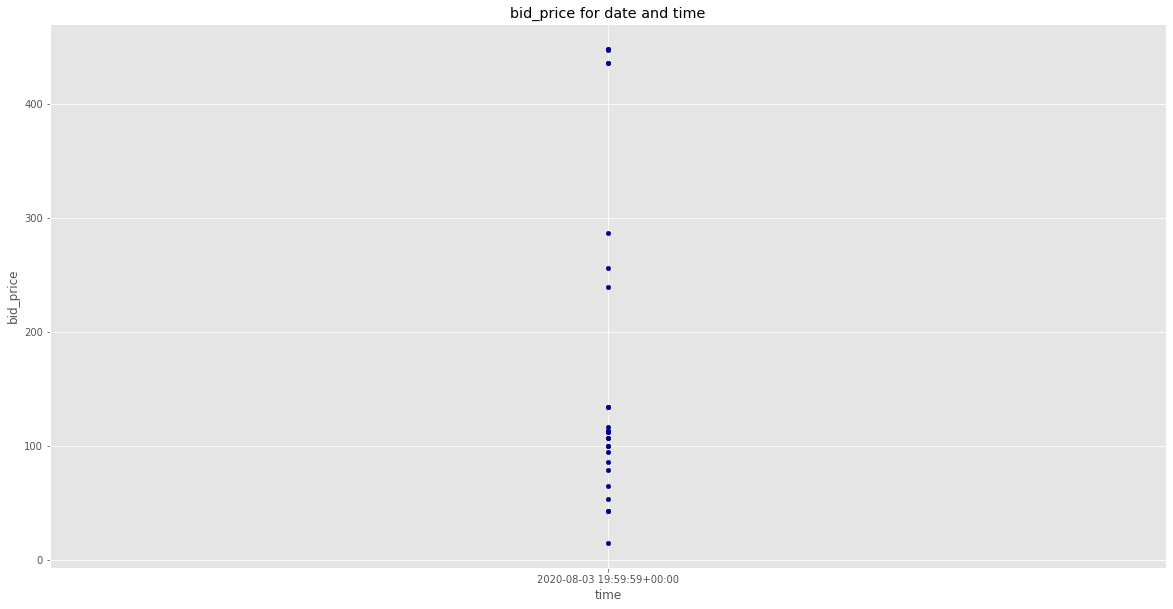

In [42]:
D1.plot(kind='scatter', x='time', y='bid_price', figsize=(20,10), color='darkblue')
plt.title('bid_price for date and time')

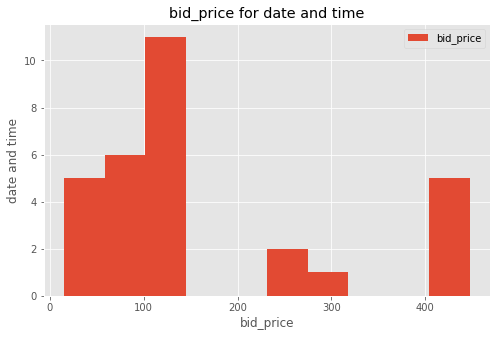

In [43]:
D1[['time','bid_price']].plot(kind='hist', figsize=(8, 5))
plt.title('bid_price for date and time') # add a title to the histogram
plt.ylabel('date and time') # add y-label
plt.xlabel('bid_price') # add x-label

plt.show()

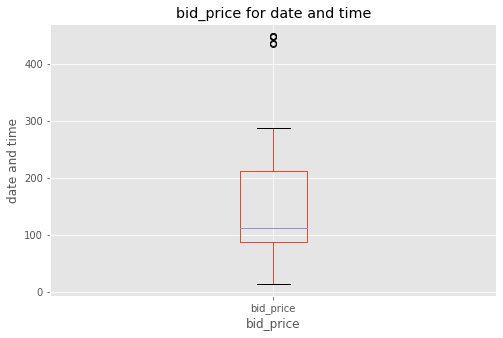

In [44]:
D1[['time','bid_price']].plot(kind='box', figsize=(8, 5))
plt.title('bid_price for date and time') # add a title to the histogram
plt.ylabel('date and time') # add y-label
plt.xlabel('bid_price') # add x-label

plt.show()

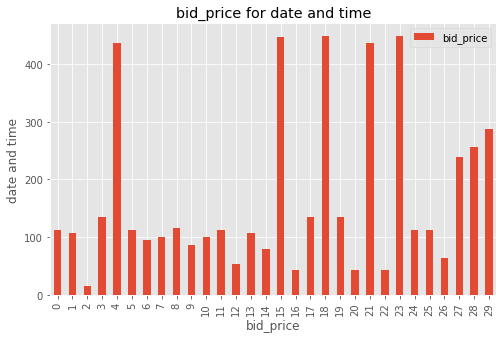

In [45]:
D1[['time','bid_price']].plot(kind='bar', figsize=(8, 5))
plt.title('bid_price for date and time') # add a title to the histogram
plt.ylabel('date and time') # add y-label
plt.xlabel('bid_price') # add x-label

plt.show()

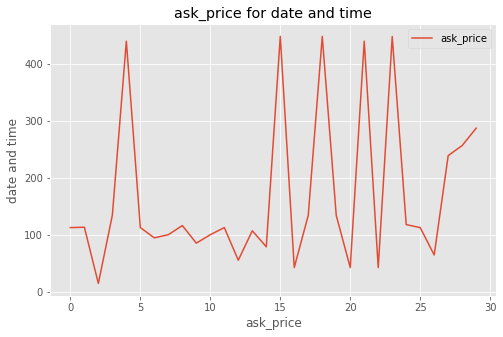

In [46]:
D1[['time','ask_price']].plot(kind='line', figsize=(8, 5))
plt.title('ask_price for date and time') # add a title to the histogram
plt.ylabel('date and time') # add y-label
plt.xlabel('ask_price') # add x-label

plt.show()

Text(0.5, 1.0, 'ask_price for date and time')

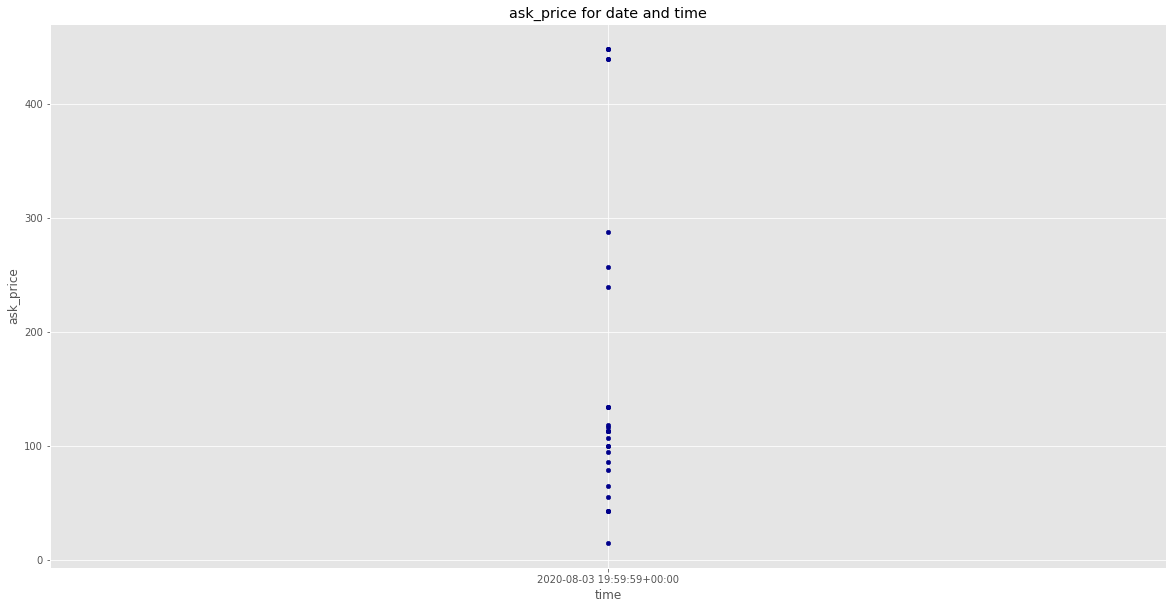

In [47]:
D1.plot(kind='scatter', x='time', y='ask_price', figsize=(20,10), color='darkblue')
plt.title('ask_price for date and time')

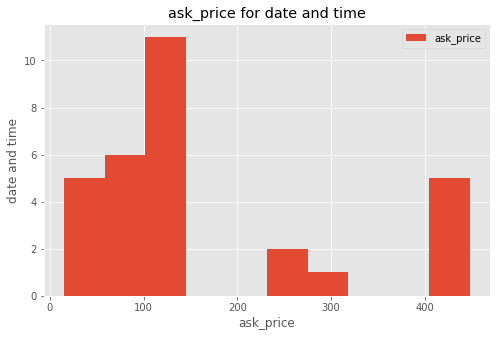

In [48]:
D1[['time','ask_price']].plot(kind='hist', figsize=(8, 5))
plt.title('ask_price for date and time') # add a title to the histogram
plt.ylabel('date and time') # add y-label
plt.xlabel('ask_price') # add x-label

plt.show()

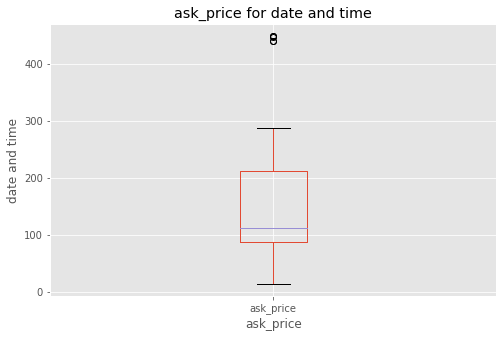

In [49]:
D1[['time','ask_price']].plot(kind='box', figsize=(8, 5))
plt.title('ask_price for date and time') # add a title to the histogram
plt.ylabel('date and time') # add y-label
plt.xlabel('ask_price') # add x-label

plt.show()

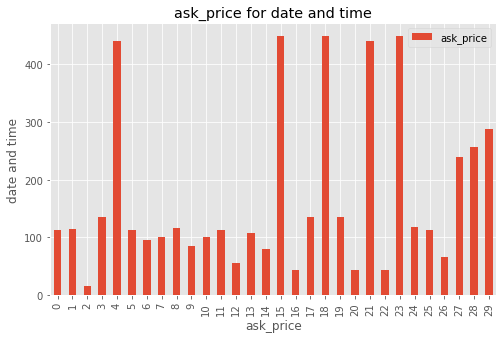

In [50]:
D1[['time','ask_price']].plot(kind='bar', figsize=(8, 5))
plt.title('ask_price for date and time') # add a title to the histogram
plt.ylabel('date and time') # add y-label
plt.xlabel('ask_price') # add x-label

plt.show()

In [51]:
D1.corr()



,bid_price,bid_size,ask_price,ask_size
bid_price,1.000000,-0.147783,0.999926,-0.238993
bid_size,-0.147783,1.000000,-0.146107,0.111493
ask_price,0.999926,-0.146107,1.000000,-0.241344
ask_size,-0.238993,0.111493,-0.241344,1.000000


In [57]:
group2=D1[['ticker', 'bid_price','ask_price']].groupby(['ticker'])

In [58]:
group2.head(2)

,ticker,bid_price,ask_price
0,AKAM,112.89,113.05
1,AIZ,107.26,113.65
2,AES,15.11,15.13
3,ADP,134.37,134.72
4,AAPL,435.79,439.84
5,AKAM,112.69,113.05
6,AME,94.90,95.08
7,ALLE,100.01,100.59
8,ADI,116.47,116.62
9,AEP,85.74,85.80


In [59]:
group2.get_group('AAPL')['ask_price']



4     439.84
21    439.84
Name: ask_price, dtype: float64

In [60]:
group2.get_group('AAPL')['bid_price']

4     435.79
21    435.41
Name: bid_price, dtype: float64

In [5]:
D2 = pd.read_csv("rating.csv")


In [62]:
D2.head(163)


,symbol,ratingBuy,ratingOverweight,ratingHold,ratingUnderweight,ratingSell,ratingNone,ratingScaleMark,consensusStartDate,consensusEndDate
0,ABC,9,1,7,1,0,0,1.500000,2020-08-28 00:00:00+00:00,2020-08-31 00:00:00+00:00
1,BMY,7,2,6,0,0,0,1.466667,2020-08-27 00:00:00+00:00,2020-08-27 00:00:00+00:00
2,O,7,1,9,0,0,0,1.558824,2020-08-27 00:00:00+00:00,2020-08-31 00:00:00+00:00
3,DRI,19,1,11,0,0,0,1.370968,2020-08-26 00:00:00+00:00,2020-08-26 00:00:00+00:00
4,TMUS,19,2,5,1,0,0,1.277778,2020-08-26 00:00:00+00:00,2020-08-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
158,DVA,3,0,10,0,0,0,1.769231,2020-08-04 00:00:00+00:00,2020-08-10 00:00:00+00:00
159,TDG,8,0,7,1,0,0,1.531250,2020-08-04 00:00:00+00:00,2020-08-06 00:00:00+00:00
160,TTWO,17,2,4,2,0,0,1.320000,2020-08-04 00:00:00+00:00,2020-08-28 00:00:00+00:00
161,MOS,11,2,8,0,0,0,1.428571,2020-08-04 00:00:00+00:00,2020-08-19 00:00:00+00:00


In [3]:
D3= pd.read_csv("bar.csv")


In [7]:
D4=pd.merge(D2, D3, how='inner', on='symbol', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
D4

,symbol,ratingBuy,ratingOverweight,ratingHold,ratingUnderweight,ratingSell,ratingNone,ratingScaleMark,consensusStartDate,consensusEndDate,time,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
0,A,6,1,6,1,0,0,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,2020-09-02 19:48:00+00:00,426,111638,103.4715,103.450,103.495,103.450,103.495,102.3616,1.599076e+12,1.599076e+12
1,A,6,1,6,1,0,0,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,2020-09-02 19:23:00+00:00,544,97184,103.1142,103.125,103.125,103.120,103.120,102.2235,1.599075e+12,1.599075e+12
2,A,6,1,6,1,0,0,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,2020-09-02 19:00:00+00:00,228,87290,102.8775,102.880,102.880,102.880,102.880,102.1406,1.599073e+12,1.599073e+12
3,A,6,1,6,1,0,0,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,2020-09-02 18:11:00+00:00,400,79698,102.7750,102.770,102.780,102.770,102.780,102.0778,1.599070e+12,1.599070e+12
4,A,6,1,6,1,0,0,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,2020-09-02 17:51:00+00:00,420,74482,102.8700,102.870,102.870,102.870,102.870,102.0269,1.599069e+12,1.599069e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179211,ZTS,12,0,6,1,0,0,1.394737,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,2020-08-04 19:51:00+00:00,2262,130046,155.1876,155.205,155.205,155.160,155.160,154.7544,1.596571e+12,1.596571e+12
2179212,ZTS,12,0,6,1,0,0,1.394737,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,2020-08-04 19:50:00+00:00,646,127784,155.1974,155.190,155.210,155.190,155.210,154.7467,1.596571e+12,1.596571e+12
2179213,ZTS,12,0,6,1,0,0,1.394737,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,2020-08-04 19:49:00+00:00,1410,127138,155.1756,155.160,155.190,155.160,155.190,154.7444,1.596571e+12,1.596571e+12
2179214,ZTS,12,0,6,1,0,0,1.394737,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,2020-08-04 19:48:00+00:00,200,125728,155.1800,155.180,155.180,155.180,155.180,154.7396,1.596570e+12,1.596571e+12


In [8]:
D4[['symbol','ratingBuy','ratingScaleMark','consensusStartDate','consensusEndDate','average_price']]

,symbol,ratingBuy,ratingScaleMark,consensusStartDate,consensusEndDate,average_price
0,A,6,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,102.3616
1,A,6,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,102.2235
2,A,6,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,102.1406
3,A,6,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,102.0778
4,A,6,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,102.0269
...,...,...,...,...,...,...
2179211,ZTS,12,1.394737,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,154.7544
2179212,ZTS,12,1.394737,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,154.7467
2179213,ZTS,12,1.394737,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,154.7444
2179214,ZTS,12,1.394737,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,154.7396


In [9]:
D4[['consensusStartDate','consensusEndDate','average_price']]




,consensusStartDate,consensusEndDate,average_price
0,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,102.3616
1,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,102.2235
2,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,102.1406
3,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,102.0778
4,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,102.0269
...,...,...,...
2179211,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,154.7544
2179212,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,154.7467
2179213,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,154.7444
2179214,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,154.7396


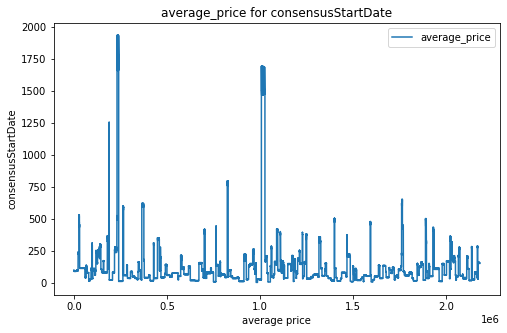

In [10]:
D4[['consensusStartDate','average_price']].plot(kind='line', figsize=(8, 5))
plt.title('average_price for consensusStartDate') # add a title to the histogram
plt.ylabel('consensusStartDate') # add y-label
plt.xlabel('average price') # add x-label

plt.show()

Text(0.5, 1.0, 'average_price for consensusStartDate')

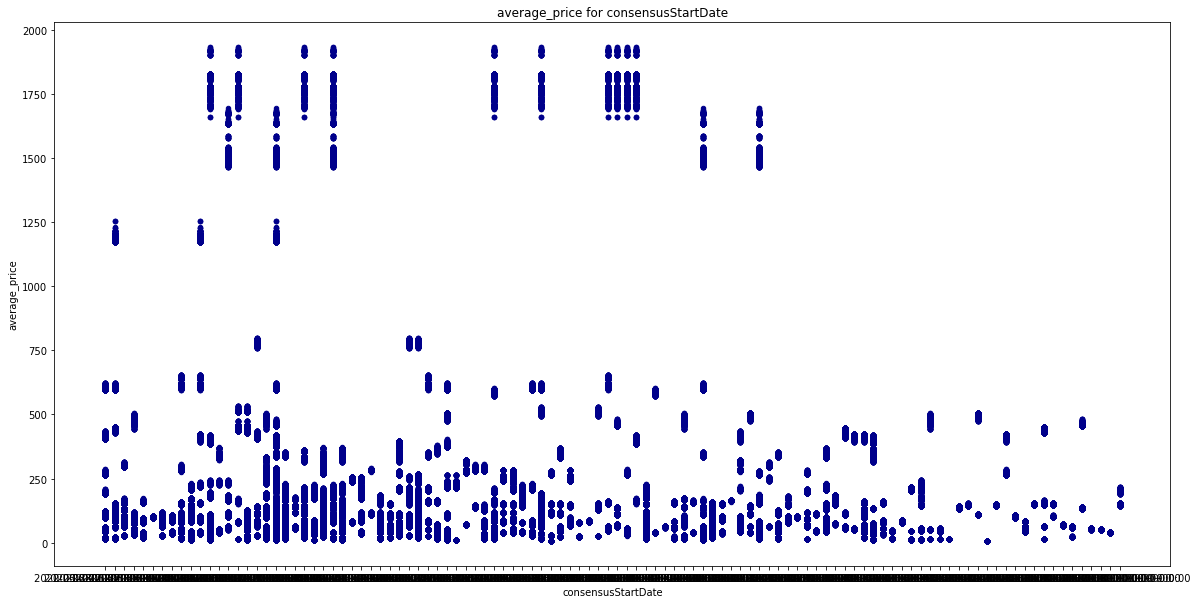

In [11]:
D4.plot(kind='scatter', x='consensusStartDate', y='average_price', figsize=(20,10), color='darkblue')
plt.title('average_price for consensusStartDate')

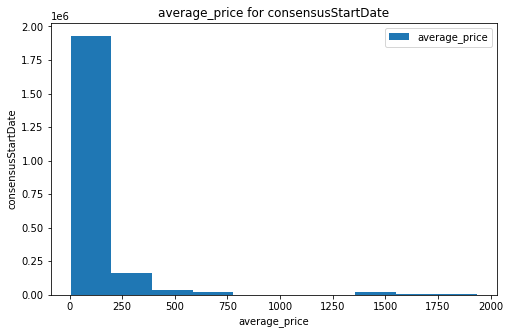

In [12]:
D4[['consensusStartDate','average_price']].plot(kind='hist', figsize=(8, 5))
plt.title('average_price for consensusStartDate') # add a title to the histogram
plt.ylabel('consensusStartDate') # add y-label
plt.xlabel('average_price') # add x-label

plt.show()

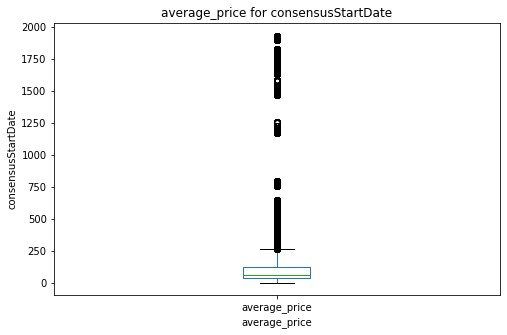

In [13]:
D4[['consensusStartDate','average_price']].plot(kind='box', figsize=(8, 5))
plt.title('average_price for consensusStartDate') # add a title to the histogram
plt.ylabel('consensusStartDate') # add y-label
plt.xlabel('average_price') # add x-label

plt.show()

In [17]:
D0[0:19904]


,time,symbol,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
0,2020-09-02 22:46:00+00:00,AAPL,100,5477495,131.5890,131.589,131.589,131.589,131.589,131.5506,1.599087e+12,1.599087e+12
1,2020-09-02 22:45:00+00:00,AAPL,100,5477395,131.5190,131.519,131.519,131.519,131.519,131.5506,1.599087e+12,1.599087e+12
2,2020-09-02 22:43:00+00:00,AAPL,100,5477295,131.5590,131.559,131.559,131.559,131.559,131.5506,1.599087e+12,1.599087e+12
3,2020-09-02 21:15:00+00:00,AAPL,100,5477167,131.5440,131.544,131.544,131.544,131.544,131.5506,1.599081e+12,1.599081e+12
4,2020-09-02 21:12:00+00:00,AAPL,100,5477067,131.4390,131.439,131.439,131.439,131.439,131.5506,1.599081e+12,1.599081e+12
...,...,...,...,...,...,...,...,...,...,...,...,...
19899,2020-08-31 19:46:00+00:00,WEC,888,94886,94.1048,94.095,94.120,94.095,94.120,93.9831,1.598903e+12,1.598903e+12
19900,2020-08-31 19:46:00+00:00,UA,2030,221318,8.8924,8.895,8.895,8.885,8.890,8.8655,1.598903e+12,1.598903e+12
19901,2020-08-31 19:46:00+00:00,RTX,5424,542700,61.1650,61.140,61.210,61.135,61.210,61.7360,1.598903e+12,1.598903e+12
19902,2020-08-31 19:46:00+00:00,GS,1448,117952,205.3656,205.210,205.470,205.210,205.445,205.0695,1.598903e+12,1.598903e+12


In [18]:
D0[20220:1074858]


,time,symbol,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
20220,2020-08-31 19:15:00+00:00,JCI,200,103598,40.8250,40.825,40.825,40.825,40.825,40.9876,1.598901e+12,1.598901e+12
20221,2020-08-31 19:15:00+00:00,AMGN,402,143354,253.3127,253.350,253.350,253.280,253.280,252.0104,1.598901e+12,1.598901e+12
20222,2020-08-31 19:15:00+00:00,MTB,402,34970,103.5700,103.570,103.570,103.570,103.570,104.3159,1.598901e+12,1.598901e+12
20223,2020-08-31 19:15:00+00:00,ROL,404,66534,55.3301,55.330,55.330,55.330,55.330,55.2282,1.598901e+12,1.598901e+12
20224,2020-08-31 19:15:00+00:00,NKE,404,167860,112.0897,112.090,112.090,112.090,112.090,111.7700,1.598901e+12,1.598901e+12
...,...,...,...,...,...,...,...,...,...,...,...,...
1074853,2020-08-04 19:46:00+00:00,MTB,800,50890,103.8650,103.860,103.870,103.860,103.860,103.9461,1.596570e+12,1.596570e+12
1074854,2020-08-04 19:46:00+00:00,HPQ,5256,989384,17.8981,17.900,17.900,17.890,17.895,17.8757,1.596570e+12,1.596570e+12
1074855,2020-08-04 19:46:00+00:00,ICE,670,226960,95.8265,95.830,95.830,95.825,95.825,95.5166,1.596570e+12,1.596570e+12
1074856,2020-08-04 19:46:00+00:00,VLO,764,375410,53.0068,53.015,53.015,53.000,53.000,52.9820,1.596570e+12,1.596570e+12


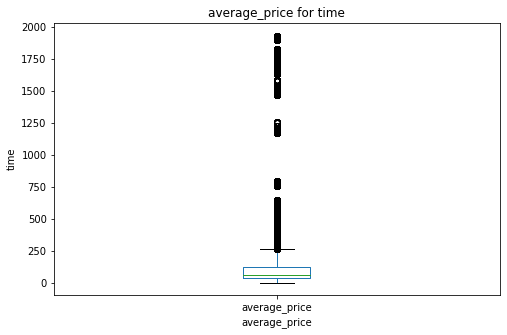

In [19]:
D4[['time','average_price']].plot(kind='box', figsize=(8, 5))
plt.title('average_price for time') # add a title to the histogram
plt.ylabel('time') # add y-label
plt.xlabel('average_price') # add x-label

plt.show()

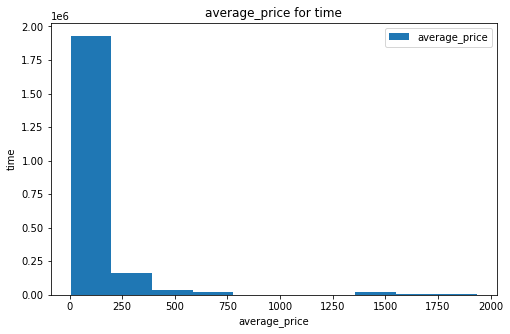

In [21]:
D4[['time','average_price']].plot(kind='hist', figsize=(8, 5))
plt.title('average_price for time') # add a title to the histogram
plt.ylabel('time') # add y-label
plt.xlabel('average_price') # add x-label

plt.show()

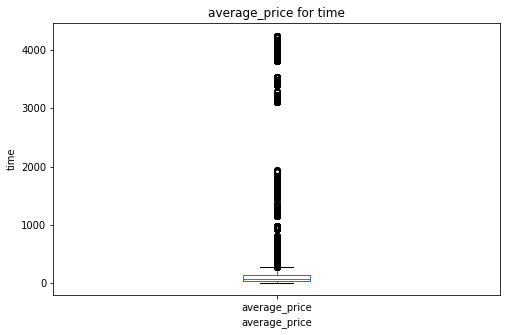

In [24]:
D3[['time','average_price']].plot(kind='box', figsize=(8, 5))
plt.title('average_price for time') # add a title to the histogram
plt.ylabel('time') # add y-label
plt.xlabel('average_price') # add x-label

plt.show()

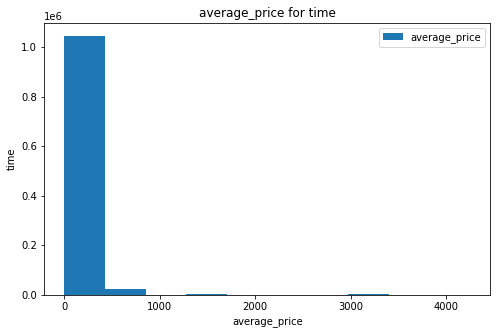

In [25]:
D3[['time','average_price']].plot(kind='hist', figsize=(8, 5))
plt.title('average_price for time') # add a title to the histogram
plt.ylabel('time') # add y-label
plt.xlabel('average_price') # add x-label

plt.show()

In [26]:
D5=pd.read_csv('target.csv')

In [27]:
D5[D5['updatedDate'] == '2020-08-31']


,symbol,updatedDate,priceTargetAverage,priceTargetHigh,priceTargetLow,numberOfAnalysts
184,SO,2020-08-31,59.66,67.00,52.50,16.0
185,WYNN,2020-08-31,96.13,125.00,72.00,15.0
186,APH,2020-08-31,114.13,140.00,95.00,15.0
187,DIS,2020-08-31,133.67,150.00,103.00,21.0
188,URI,2020-08-31,183.87,305.00,136.00,15.0
189,URI,2020-08-31,179.53,305.00,110.00,15.0
190,PGR,2020-08-31,96.07,115.00,81.00,15.0
191,CHD,2020-08-31,94.33,111.00,75.00,15.0
192,BIIB,2020-08-31,305.22,386.00,228.00,27.0
193,DISCK,2020-08-31,24.40,33.00,17.00,21.0


In [28]:
D0[19904:20220]




,time,symbol,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
19904,2020-08-31 19:26:00+00:00,LRCX,139,86741,337.0240,337.055,337.055,337.055,337.055,340.0982,1.598902e+12,1.598902e+12
19905,2020-08-31 19:26:00+00:00,COG,2506,736570,18.8705,18.870,18.875,18.870,18.875,18.8487,1.598902e+12,1.598902e+12
19906,2020-08-31 19:26:00+00:00,LEN,454,88960,75.2215,75.220,75.220,75.220,75.220,75.2001,1.598902e+12,1.598902e+12
19907,2020-08-31 19:26:00+00:00,KR,5946,620998,35.5062,35.500,35.520,35.500,35.510,35.3241,1.598902e+12,1.598902e+12
19908,2020-08-31 19:26:00+00:00,MAR,305,116961,103.2167,103.200,103.225,103.200,103.225,104.0585,1.598902e+12,1.598902e+12
...,...,...,...,...,...,...,...,...,...,...,...,...
20215,2020-08-31 19:26:00+00:00,PLD,604,237122,101.8400,101.840,101.840,101.840,101.840,101.5332,1.598902e+12,1.598902e+12
20216,2020-08-31 19:26:00+00:00,MRK,1482,487478,85.3800,85.360,85.390,85.360,85.390,85.4787,1.598902e+12,1.598902e+12
20217,2020-08-31 19:26:00+00:00,BAC,32658,5756568,25.7817,25.780,25.790,25.775,25.790,25.8180,1.598902e+12,1.598902e+12
20218,2020-08-31 19:26:00+00:00,WDC,1531,249520,38.0516,38.050,38.080,38.040,38.080,38.0384,1.598902e+12,1.598902e+12


In [29]:
D6=pd.merge(D4, D5, how='inner', on='symbol', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
D6

,symbol,ratingBuy,ratingOverweight,ratingHold,ratingUnderweight,ratingSell,ratingNone,ratingScaleMark,consensusStartDate,consensusEndDate,time,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending,updatedDate,priceTargetAverage,priceTargetHigh,priceTargetLow,numberOfAnalysts
0,A,6,1,6,1,0,0,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,2020-09-02 19:48:00+00:00,426,111638,103.4715,103.450,103.495,103.450,103.495,102.3616,1.599076e+12,1.599076e+12,2020-08-19,102.38,110.0,88.0,13.0
1,A,6,1,6,1,0,0,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,2020-09-02 19:23:00+00:00,544,97184,103.1142,103.125,103.125,103.120,103.120,102.2235,1.599075e+12,1.599075e+12,2020-08-19,102.38,110.0,88.0,13.0
2,A,6,1,6,1,0,0,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,2020-09-02 19:00:00+00:00,228,87290,102.8775,102.880,102.880,102.880,102.880,102.1406,1.599073e+12,1.599073e+12,2020-08-19,102.38,110.0,88.0,13.0
3,A,6,1,6,1,0,0,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,2020-09-02 18:11:00+00:00,400,79698,102.7750,102.770,102.780,102.770,102.780,102.0778,1.599070e+12,1.599070e+12,2020-08-19,102.38,110.0,88.0,13.0
4,A,6,1,6,1,0,0,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,2020-09-02 17:51:00+00:00,420,74482,102.8700,102.870,102.870,102.870,102.870,102.0269,1.599069e+12,1.599069e+12,2020-08-19,102.38,110.0,88.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371659,ZTS,12,0,6,1,0,0,1.394737,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,2020-08-04 19:51:00+00:00,2262,130046,155.1876,155.205,155.205,155.160,155.160,154.7544,1.596571e+12,1.596571e+12,2020-08-20,169.86,185.0,126.0,14.0
3371660,ZTS,12,0,6,1,0,0,1.394737,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,2020-08-04 19:50:00+00:00,646,127784,155.1974,155.190,155.210,155.190,155.210,154.7467,1.596571e+12,1.596571e+12,2020-08-20,169.86,185.0,126.0,14.0
3371661,ZTS,12,0,6,1,0,0,1.394737,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,2020-08-04 19:49:00+00:00,1410,127138,155.1756,155.160,155.190,155.160,155.190,154.7444,1.596571e+12,1.596571e+12,2020-08-20,169.86,185.0,126.0,14.0
3371662,ZTS,12,0,6,1,0,0,1.394737,2020-06-11 00:00:00+00:00,2020-06-22 00:00:00+00:00,2020-08-04 19:48:00+00:00,200,125728,155.1800,155.180,155.180,155.180,155.180,154.7396,1.596570e+12,1.596571e+12,2020-08-20,169.86,185.0,126.0,14.0


In [30]:
D6[['time','average_price']]




,time,average_price
0,2020-09-02 19:48:00+00:00,102.3616
1,2020-09-02 19:23:00+00:00,102.2235
2,2020-09-02 19:00:00+00:00,102.1406
3,2020-09-02 18:11:00+00:00,102.0778
4,2020-09-02 17:51:00+00:00,102.0269
...,...,...
3371659,2020-08-04 19:51:00+00:00,154.7544
3371660,2020-08-04 19:50:00+00:00,154.7467
3371661,2020-08-04 19:49:00+00:00,154.7444
3371662,2020-08-04 19:48:00+00:00,154.7396


In [31]:
D7=D6[0:19904]
D8=D7[['time','average_price']]

In [32]:
frames = [D8, D7]

result = pd.concat(frames)
result.sort_values(by=['average_price'],ascending= False)

,time,average_price,symbol,ratingBuy,ratingOverweight,ratingHold,ratingUnderweight,ratingSell,ratingNone,ratingScaleMark,consensusStartDate,consensusEndDate,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,epoch_time_at_the_beginning,epoch_time_at_the_ending,updatedDate,priceTargetAverage,priceTargetHigh,priceTargetLow,numberOfAnalysts
0,2020-09-02 19:48:00+00:00,102.3616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2020-09-02 19:48:00+00:00,102.3616,A,6.0,1.0,6.0,1.0,0.0,0.0,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,426.0,111638.0,103.4715,103.450,103.495,103.45,103.495,1.599076e+12,1.599076e+12,2020-08-19,102.38,110.0,88.0,13.0
1,2020-09-02 19:23:00+00:00,102.2235,A,6.0,1.0,6.0,1.0,0.0,0.0,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,544.0,97184.0,103.1142,103.125,103.125,103.12,103.120,1.599075e+12,1.599075e+12,2020-08-19,102.38,110.0,88.0,13.0
1,2020-09-02 19:23:00+00:00,102.2235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-09-02 19:00:00+00:00,102.1406,A,6.0,1.0,6.0,1.0,0.0,0.0,1.571429,2020-05-28 00:00:00+00:00,2020-06-28 00:00:00+00:00,228.0,87290.0,102.8775,102.880,102.880,102.88,102.880,1.599073e+12,1.599073e+12,2020-08-19,102.38,110.0,88.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14578,2020-09-02 13:32:00+00:00,92.1056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14579,2020-09-02 13:32:00+00:00,92.1056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14579,2020-09-02 13:32:00+00:00,92.1056,ABBV,11.0,1.0,5.0,0.0,0.0,0.0,1.323529,2020-06-22 00:00:00+00:00,2020-07-01 00:00:00+00:00,2130.0,29024.0,92.3083,92.300,92.350,92.30,92.310,1.599054e+12,1.599054e+12,2020-08-30,110.33,127.0,96.0,15.0
8284,2020-09-02 13:32:00+00:00,92.1056,ABBV,11.0,1.0,4.0,0.0,0.0,0.0,1.281250,2020-07-02 00:00:00+00:00,2020-08-11 00:00:00+00:00,2130.0,29024.0,92.3083,92.300,92.350,92.30,92.310,1.599054e+12,1.599054e+12,2020-09-01,110.00,127.0,96.0,16.0


In [33]:
D0[419851:1074859]


,time,symbol,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
419851,2020-08-12 19:53:00+00:00,ULTA,426,31005,217.0248,216.990,217.090,216.990,217.090,214.9380,1.597262e+12,1.597262e+12
419852,2020-08-12 19:53:00+00:00,TFX,230,18772,376.6043,376.560,376.560,376.560,376.560,378.3622,1.597262e+12,1.597262e+12
419853,2020-08-12 19:53:00+00:00,VIAC,1203,329771,26.2495,26.260,26.260,26.240,26.240,26.3536,1.597262e+12,1.597262e+12
419854,2020-08-12 19:53:00+00:00,MPC,5840,341986,38.0093,38.030,38.030,38.000,38.000,37.9957,1.597262e+12,1.597262e+12
419855,2020-08-12 19:53:00+00:00,BDX,858,123842,257.7656,257.815,257.815,257.700,257.700,258.2972,1.597262e+12,1.597262e+12
...,...,...,...,...,...,...,...,...,...,...,...,...
1074854,2020-08-04 19:46:00+00:00,HPQ,5256,989384,17.8981,17.900,17.900,17.890,17.895,17.8757,1.596570e+12,1.596570e+12
1074855,2020-08-04 19:46:00+00:00,ICE,670,226960,95.8265,95.830,95.830,95.825,95.825,95.5166,1.596570e+12,1.596570e+12
1074856,2020-08-04 19:46:00+00:00,VLO,764,375410,53.0068,53.015,53.015,53.000,53.000,52.9820,1.596570e+12,1.596570e+12
1074857,2020-08-04 19:46:00+00:00,CF,2904,437066,32.4800,32.475,32.485,32.475,32.485,32.5062,1.596570e+12,1.596570e+12


In [34]:
import csv
D9=pd.read_csv('news.csv')
D9

,datetime,stock,summary,date
0,2020-09-03 03:24:00+00:00,FB,The sources claim that discussions with Facebo...,2020-09-03
1,2020-09-03 03:07:51+00:00,VZ,Firms in talks to buy a stake in struggling te...,2020-09-03
2,2020-09-03 03:00:00+00:00,AMZN,Die Plattform eBay wird 25: Gebrauchtes findet...,2020-09-03
3,2020-09-03 02:47:00+00:00,MCK,US News: Dallas-based wholesaler McKesson Corp...,2020-09-03
4,2020-09-03 02:45:00+00:00,FB,The Daily Beast : Sources: Mark Zuckerberg sai...,2020-09-03
...,...,...,...,...
9263,2019-07-24 21:20:00+00:00,CPRT,The S&P 500’s last company without a female bo...,2019-07-24
9264,2019-07-01 20:20:00+00:00,MAA,"GERMANTOWN, Tenn. , July 1, 2019 /PRNewswire/ ...",2019-07-01
9265,2019-05-28 12:12:00+00:00,CPRT,Unit volume and expansion of facilities across...,2019-05-28
9266,2019-05-24 11:48:01+00:00,CPRT,This is a Real-time headline. These are breaki...,2019-05-24


In [48]:
D10=D9.rename(columns={"datetime": "time"})
D10


,time,stock,summary,date
0,2020-09-03 03:24:00+00:00,FB,The sources claim that discussions with Facebo...,2020-09-03
1,2020-09-03 03:07:51+00:00,VZ,Firms in talks to buy a stake in struggling te...,2020-09-03
2,2020-09-03 03:00:00+00:00,AMZN,Die Plattform eBay wird 25: Gebrauchtes findet...,2020-09-03
3,2020-09-03 02:47:00+00:00,MCK,US News: Dallas-based wholesaler McKesson Corp...,2020-09-03
4,2020-09-03 02:45:00+00:00,FB,The Daily Beast : Sources: Mark Zuckerberg sai...,2020-09-03
...,...,...,...,...
9263,2019-07-24 21:20:00+00:00,CPRT,The S&P 500’s last company without a female bo...,2019-07-24
9264,2019-07-01 20:20:00+00:00,MAA,"GERMANTOWN, Tenn. , July 1, 2019 /PRNewswire/ ...",2019-07-01
9265,2019-05-28 12:12:00+00:00,CPRT,Unit volume and expansion of facilities across...,2019-05-28
9266,2019-05-24 11:48:01+00:00,CPRT,This is a Real-time headline. These are breaki...,2019-05-24


In [49]:
D11=pd.merge(D0, D10, how='inner', on='time', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
D11

,time,symbol,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending,stock,summary,date
0,2020-08-04 19:52:00+00:00,ED,800,104592,75.7838,75.795,75.795,75.780,75.780,75.9511,1.596571e+12,1.596571e+12,CME,Futures-exchange operator CME Group has agreed...,2020-08-04
1,2020-08-04 19:52:00+00:00,PPG,1000,79344,107.7080,107.700,107.730,107.690,107.730,107.7393,1.596571e+12,1.596571e+12,CME,Futures-exchange operator CME Group has agreed...,2020-08-04
2,2020-08-04 19:52:00+00:00,BEN,5056,247312,21.1727,21.175,21.180,21.170,21.170,21.2488,1.596571e+12,1.596571e+12,CME,Futures-exchange operator CME Group has agreed...,2020-08-04
3,2020-08-04 19:52:00+00:00,FAST,3161,268516,47.3756,47.385,47.385,47.370,47.375,47.3754,1.596571e+12,1.596571e+12,CME,Futures-exchange operator CME Group has agreed...,2020-08-04
4,2020-08-04 19:52:00+00:00,MA,1494,379226,313.9752,313.945,314.000,313.945,314.000,313.4363,1.596571e+12,1.596571e+12,CME,Futures-exchange operator CME Group has agreed...,2020-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75591,2020-09-02 20:30:00+00:00,AAPL,209,5474663,131.6797,131.740,131.740,131.620,131.620,131.5506,1.599079e+12,1.599079e+12,UPS,"SAN JOSE, Calif., Sept. 2, 2020 /PRNewswire/ -...",2020-09-02
75592,2020-09-02 20:31:00+00:00,AAPL,412,5475075,131.6773,131.690,131.695,131.630,131.630,131.5506,1.599079e+12,1.599079e+12,ADP,The Dow wasn't deterred by a lousy ADP payroll...,2020-09-02
75593,2020-09-02 20:31:00+00:00,PVH,212,272334,63.3547,63.370,63.370,63.370,63.370,59.3211,1.599079e+12,1.599079e+12,ADP,The Dow wasn't deterred by a lousy ADP payroll...,2020-09-02
75594,2020-09-02 20:58:00+00:00,GE,396,13364445,6.4000,6.400,6.400,6.400,6.400,6.3711,1.599080e+12,1.599080e+12,MSFT,Summary List Placement When Instagram was boug...,2020-09-02


In [50]:
D11[['time','stock','summary','average_price']]

,time,stock,summary,average_price
0,2020-08-04 19:52:00+00:00,CME,Futures-exchange operator CME Group has agreed...,75.9511
1,2020-08-04 19:52:00+00:00,CME,Futures-exchange operator CME Group has agreed...,107.7393
2,2020-08-04 19:52:00+00:00,CME,Futures-exchange operator CME Group has agreed...,21.2488
3,2020-08-04 19:52:00+00:00,CME,Futures-exchange operator CME Group has agreed...,47.3754
4,2020-08-04 19:52:00+00:00,CME,Futures-exchange operator CME Group has agreed...,313.4363
...,...,...,...,...
75591,2020-09-02 20:30:00+00:00,UPS,"SAN JOSE, Calif., Sept. 2, 2020 /PRNewswire/ -...",131.5506
75592,2020-09-02 20:31:00+00:00,ADP,The Dow wasn't deterred by a lousy ADP payroll...,131.5506
75593,2020-09-02 20:31:00+00:00,ADP,The Dow wasn't deterred by a lousy ADP payroll...,59.3211
75594,2020-09-02 20:58:00+00:00,MSFT,Summary List Placement When Instagram was boug...,6.3711
